In [2]:
#importamos librería
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
from scipy import stats

# **DATASETS**

**Consideraciones**:

El proyecto propuesto por el grupo requiere datos sobre la disponibilidad de agua y el consumo de agua por habitante. Sin embargo, dichos datos no estaban disponibles en el planteamiento del problema, a saber:

    1. Precipitacions Barcelona Des De 1786 , 
    2. Dipòsits d'aigües pluvials a la ciutat de Barcelona
    3. Temperatures mitjanes mensuals de l’aire de la ciutat de Barcelona des de 1780 Link
    4. Àrees de la ciutat de Barcelona amb absència de vegetació Link


Incluso, para estimar el volumen de captación de agua, notamos que el Conjunto de Datos (2) no proporciona la capacidad ni el nivel de agua de los depósitos allí descritos.

Por lo tanto, la opción que teníamos para mantener viable el proyecto, como se propuso inicialmente, sin perjudicar al resto de expertos del grupo, era buscar otras fuentes de datos oficiales, lo que logramos. 

Las fuentes encontradas fueron (datos oficiales de la Adjunta de Barcelona):
 
    A. Evolución de la población total (1970-2022): https://ajuntament.barcelona.cat/estadistica/castella/Estadistiques_per_temes/Poblacio_i_demografia/Poblacio/Xifres_oficials_poblacio/evo/t01.htm

    B. Evolución mensual del consumo de agua (1995-2023): https://ajuntament.barcelona.cat/estadistica/angles/Estadistiques_per_temes/Economia/Consum_comerc_i_preus/Consum/coev04.htm
    
Los datos resultantes demandaran revisiones/manipulaciones para eliminar inconsistencias.

Comentarios:

Para estimar la extracción de agua, investigamos los siguientes conjuntos de datos, las fuentes encontradas fueron (datos oficiales de la Diputación de Barcelona):


C. Superficie (ha) 2021 por Barrios: https://ajuntament.barcelona.cat/estadistica/castella/Territori/sup/a2021/S03.htm

D. Estat dels embassaments de conques internes de capacitat superior a 2 hm³ a
15/11/2023  : https://info.aca.gencat.cat/ca/aca/informacio/informesdwh/dades_embassaments_ca.pdf



In [3]:
#A. Evolución de la población total (1970-2022)
df_poblacion = pd.read_csv("Datos/PoblacionEvolucion.csv",sep=";")

#B. Evolución mensual del consumo de agua (1995-2023)
df_consumo = pd.read_csv("Datos/ConsumoHistorico.csv",sep=";")

#1. Precipitacions Barcelona Des De 1786
df_precip = pd.read_csv("Datos/precipitacionsbarcelonadesde1786.csv")

#3. Temperatures mitjanes mensuals de l’aire de la ciutat de Barcelona des de 1780 Link
df_temp = pd.read_csv("Datos/temperaturesbarcelonadesde1780.csv")

In [4]:
df_poblacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Año         23 non-null     object
 1   Barcelona   23 non-null     object
 2   Bcn_metro   23 non-null     object
 3   Bcn_metro2  23 non-null     object
 4   Provincia   23 non-null     object
 5   Cataluna    23 non-null     object
 6   Espana      23 non-null     object
dtypes: object(7)
memory usage: 1.4+ KB


In [ ]:
""" #### Campos ####
Año :       | Año
Barcelona   | Población Barcelona
Bcn_metro   | Población Barcelona - Área Metropolitana
Bcn_metro2  | Población Barcelona - Âmbito Metropolitano
Provincia   | Población Barcelona - Província
Cataluna    | Población Región
Espana      | Población España"""

In [17]:
['Año', 'Mês', 'Unnamed: 2', 'TOTAL', 'Domestico', 'Comécio y Industria',
       'Servicios Ayuntamiento']

Index(['Año', 'Mês', 'Unnamed: 2', 'TOTAL', 'Domestico', 'Comécio y Industria',
       'Servicios Ayuntamiento'],
      dtype='object')

In [ ]:
""" #### Campos ####
Año :       | Año
Barcelona   | Población Barcelona
Bcn_metro   | Población Barcelona - Área Metropolitana
Bcn_metro2  | Población Barcelona - Âmbito Metropolitano
Provincia   | Población Barcelona - Província
Cataluna    | Población Región
Espana      | Población España"""

In [15]:
#Hay ruídos en los datos del Dataset "df_poblacion":
for i in df_poblacion:
    print(" - VARIABLE: ", i)
    print("> VALORES: ", df_poblacion[i].unique(),"\n")

 - VARIABLE:  Año
> VALORES:  ['2000\xa0\xa0' '2001\xa0\xa0' '2002\xa0\xa0' '2003\xa0\xa0'
 '2004\xa0\xa0' '2005\xa0\xa0' '2006\xa0\xa0' '2007\xa0\xa0'
 '2008\xa0\xa0' '2009\xa0\xa0' '2010\xa0\xa0' '2011\xa0\xa0'
 '2012\xa0\xa0' '2013\xa0\xa0' '2014\xa0\xa0' '2015\xa0\xa0'
 '2016\xa0\xa0' '2017\xa0\xa0' '2018\xa0\xa0' '2019\xa0\xa0'
 '2020\xa0\xa0' '2021\xa0\xa0' '2022\xa0\xa0'] 

 - VARIABLE:  Barcelona
> VALORES:  ['1.496.266\xa0\xa0' '1.505.325\xa0\xa0' '1.527.190\xa0\xa0'
 '1.582.738\xa0\xa0' '1.578.546\xa0\xa0' '1.593.075\xa0\xa0'
 '1.605.602\xa0\xa0' '1.595.110\xa0\xa0' '1.615.908\xa0\xa0'
 '1.621.537\xa0\xa0' '1.619.337\xa0\xa0' '1.615.448\xa0\xa0'
 '1.620.943\xa0\xa0' '1.611.822\xa0\xa0' '1.602.386\xa0\xa0'
 '1.604.555\xa0\xa0' '1.608.746\xa0\xa0' '1.620.809\xa0\xa0'
 '1.620.343\xa0\xa0' '1.636.762\xa0\xa0' '1.664.182\xa0\xa0'
 '1.636.732\xa0\xa0' '1.636.193\xa0\xa0'] 

 - VARIABLE:  Bcn_metro
> VALORES:  ['2.903.802\xa0\xa0' '2.927.721\xa0\xa0' '2.972.870\xa0\xa0'
 '3.056.505\

In [256]:
df_poblacion["Año"] = df_poblacion["Año"].str[:4]
df_poblacion.head()

,Año,Barcelona,Bcn_metro,Bcn_metro2,Provincia,Cataluna,Espana
0,2000,1.496.266,2.903.802,4.328.447,4.736.277,6.261.999,40.499.791
1,2001,1.505.325,2.927.721,4.390.413,4.804.606,6.361.365,41.116.842
2,2002,1.527.190,2.972.870,4.482.623,4.906.117,6.506.440,41.837.894
3,2003,1.582.738,3.056.505,4.618.257,5.052.666,6.704.146,42.717.064
4,2004,1.578.546,3.069.583,4.673.648,5.117.885,6.813.319,43.197.684


In [257]:
df_poblacion["Barcelona"] = df_poblacion["Barcelona"].str[:-2]


In [258]:
df_poblacion["Barcelona"]

0     1.496.266
1     1.505.325
2     1.527.190
3     1.582.738
4     1.578.546
5     1.593.075
6     1.605.602
7     1.595.110
8     1.615.908
9     1.621.537
10    1.619.337
11    1.615.448
12    1.620.943
13    1.611.822
14    1.602.386
15    1.604.555
16    1.608.746
17    1.620.809
18    1.620.343
19    1.636.762
20    1.664.182
21    1.636.732
22    1.636.193
Name: Barcelona, dtype: object

In [259]:
df_poblacion["Barcelona"] = df_poblacion["Barcelona"].str.replace(".","")

In [260]:
df_poblacion["Barcelona"]

0     1496266
1     1505325
2     1527190
3     1582738
4     1578546
5     1593075
6     1605602
7     1595110
8     1615908
9     1621537
10    1619337
11    1615448
12    1620943
13    1611822
14    1602386
15    1604555
16    1608746
17    1620809
18    1620343
19    1636762
20    1664182
21    1636732
22    1636193
Name: Barcelona, dtype: object

In [261]:
df_poblacion["Barcelona"]

0     1496266
1     1505325
2     1527190
3     1582738
4     1578546
5     1593075
6     1605602
7     1595110
8     1615908
9     1621537
10    1619337
11    1615448
12    1620943
13    1611822
14    1602386
15    1604555
16    1608746
17    1620809
18    1620343
19    1636762
20    1664182
21    1636732
22    1636193
Name: Barcelona, dtype: object

In [262]:

df_poblacion["Barcelona"] = df_poblacion["Barcelona"].astype("int")

In [263]:
#df_consumo["Año"].unique()
df_consumo["Domestico"] = df_consumo["Domestico"].str.replace(".","")
#df_consumo[df_consumo["Año"]=="2000"]["Mês"]

In [264]:
df_consumo["Domestico"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 286 entries, 0 to 285
Series name: Domestico
Non-Null Count  Dtype 
--------------  ----- 
286 non-null    object
dtypes: object(1)
memory usage: 2.4+ KB


In [265]:
#df_consumo["Domestico"] = df_consumo["Domestico"].str[:-2]

In [266]:
df_consumo["Año"] = df_consumo["Año"].astype("str")
df_consumo.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     286 non-null    object 
 1   Mês                     286 non-null    object 
 2   Unnamed: 2              0 non-null      float64
 3   TOTAL                   286 non-null    object 
 4   Domestico               286 non-null    object 
 5   Comécio y Industria     286 non-null    object 
 6   Servicios Ayuntamiento  286 non-null    object 
dtypes: float64(1), object(6)
memory usage: 15.8+ KB


In [267]:
df_consumo["Domestico"] = df_consumo["Domestico"].astype("int")

In [268]:
df_poblacion[df_poblacion["Año"]=="2000"]["Barcelona"]

0    1496266
Name: Barcelona, dtype: int64

In [269]:
df_consumo["Mês"] = df_consumo["Mês"].str[5:-2]

In [270]:
lista_ano = df_poblacion["Año"]
lista_ano

#df_consumo_capta = pd.DataFrame(columns="consumo_capta")

lista_consumo_capta=list()
for i in lista_ano:
    for x in df_consumo["Mês"]:
        
        lista_consumo_capta.append(df_consumo[(df_consumo["Año"]==i) & (df_consumo["Mês"]==x)]["Domestico"]/df_poblacion[df_poblacion["Año"]==i]["Barcelona"])
                                              
                                              
                                        







In [353]:
lista_ano = df_poblacion["Año"]
lista_ano

#df_consumo_capta = pd.DataFrame(columns="consumo_capta")

lista_consumo_capta=list()
for x in range(df_consumo["Mês"].shape[0]):
    mes = df_consumo.iloc[x, 1]
    ano = df_consumo.iloc[x, 0]
    domestico = df_consumo.iloc[x,4]
    #print(ano, "- ", mes)
    poblacion = df_poblacion[df_poblacion["Año"]==ano]["Barcelona"].sum()
    div = domestico/poblacion
    lista_consumo_capta.append(div)
    #print(ano)
                                          
                                              
                                        







/var/folders/pf/jmy6c5mn6nq33vg6h8hlpmdw0000gn/T/ipykernel_17147/53791923.py:13: RuntimeWarning: divide by zero encountered in scalar divide
  div = domestico/poblacion


In [356]:
lista_consumo_capta

[5.136910148329241,
 3.9712644676815487,
 3.9195049543329863,
 4.804691812819378,
 3.8478044679221477,
 3.948838642326966,
 5.101681118196898,
 3.646026174490365,
 3.5504662940947664,
 4.227799067812809,
 3.5182701471529794,
 3.8123602354126875,
 4.902921296065633,
 3.752452128277947,
 3.761470778735489,
 4.726970587746832,
 3.8214186305282913,
 3.963509541128992,
 5.057604171856576,
 3.7248733662165976,
 3.558699284207729,
 4.264035341205387,
 3.4136781093783735,
 3.8443087041004436,
 4.799750522200905,
 4.866642657429658,
 3.3217936209639927,
 3.73439257721698,
 4.169258572934606,
 3.7667382578461095,
 4.413693777460565,
 4.215569771934075,
 3.554864817082354,
 3.939670244042981,
 3.7725666092627637,
 3.692955689861772,
 4.901097338915221,
 4.25250989108747,
 3.731955004555397,
 4.005367281255647,
 3.8449654965003686,
 3.6747560240545183,
 4.611006369974057,
 3.5345161359618587,
 3.450154731863391,
 4.308493256622385,
 3.7925127216254366,
 2.6747497058894143,
 4.491305923299036,
 3.9

In [382]:
df_test = df_consumo.copy()


In [383]:
df_test["consumo_mes"] = lista_consumo_capta

In [384]:
df_test["Consumo_litros_mes"] = df_test["consumo_mes"].mul(1000)

In [385]:
df_test["Consumo_litros_dia"] = df_test["Consumo_litros_mes"]/30

In [386]:
df_test.head()

,Año,Mês,Unnamed: 2,TOTAL,Domestico,Comécio y Industria,Servicios Ayuntamiento,consumo_mes,Consumo_litros_mes,Consumo_litros_dia
0,2000,Enero,NaN,11.419.599,7686184,3.139.986,593.429,5.136910,5136.910148,171.230338
1,2000,Febrero,NaN,8.658.719,5942068,2.108.414,608.237,3.971264,3971.264468,132.375482
2,2000,Marzo,NaN,9.044.661,5864622,2.506.078,673.961,3.919505,3919.504954,130.650165
3,2000,Abril,NaN,10.912.590,7189097,3.110.204,613.289,4.804692,4804.691813,160.156394
4,2000,Mayo,NaN,8.427.450,5757339,2.170.754,499.357,3.847804,3847.804468,128.260149


In [396]:
dfu = df_test[df_test["Año"]!="2023"][["Mês", "Consumo_litros_dia"]].copy()

In [404]:
dfu.head

<bound method NDFrame.head of             Mês  Consumo_litros_dia
0         Enero          171.230338
1       Febrero          132.375482
2         Marzo          130.650165
3         Abril          160.156394
4          Mayo          128.260149
..          ...                 ...
271      Agosto          101.971161
272  Septiembre           96.835153
273     Octubre           94.864216
274   Noviembre          109.855989
275   Diciembre          105.456243

[276 rows x 2 columns]>

In [438]:
csv = dfu.groupby(["Mês"], as_index=False)["Consumo_litros_dia"].mean().copy()

In [439]:
csv.to_csv("PromedioConsumoAgua.csv")



In [435]:
csv

,Consumo_litros_dia
Mês,
Abril,119.881965
Agosto,110.438661
Diciembre,86.226245
Enero,147.716194
Febrero,121.116095
Julio,131.933068
Junio,112.474479
Marzo,115.336357
Mayo,118.320058


array([[<Axes: title={'center': 'Consumo_litros_dia'}>]], dtype=object)

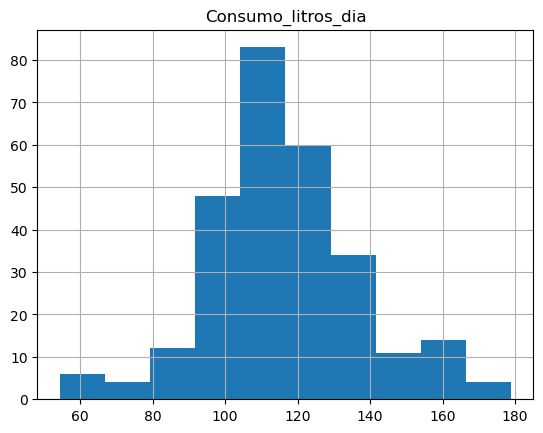

In [409]:
dfu.hist()

In [249]:
df_consumo[(df_consumo["Año"]=="2000") & (df_consumo["Mês"]=="Enero")]["Domestico"]

0    7686184
Name: Domestico, dtype: int64

In [250]:
df_poblacion[df_poblacion["Año"]==i]["Barcelona"]

22    1636193
Name: Barcelona, dtype: int64

In [275]:
df_consumo

,Año,Mês,Unnamed: 2,TOTAL,Domestico,Comécio y Industria,Servicios Ayuntamiento
0,2000,Enero,NaN,11.419.599,7686184,3.139.986,593.429
1,2000,Febrero,NaN,8.658.719,5942068,2.108.414,608.237
2,2000,Marzo,NaN,9.044.661,5864622,2.506.078,673.961
3,2000,Abril,NaN,10.912.590,7189097,3.110.204,613.289
4,2000,Mayo,NaN,8.427.450,5757339,2.170.754,499.357
...,...,...,...,...,...,...,...
281,2023,Junio,NaN,7.664.092,5149969,2.229.390,284.733
282,2023,Julio,NaN,7.762.361,5423879,2.057.134,281.348
283,2023,Agosto,NaN,7.612.225,4936415,2.332.551,343.259
284,2023,Septiembre,NaN,7.119.470,4714194,2.067.264,338.012


In [273]:
df_consumo

,Año,Mês,Unnamed: 2,TOTAL,Domestico,Comécio y Industria,Servicios Ayuntamiento
0,2000,Enero,NaN,11.419.599,7686184,3.139.986,593.429
1,2000,Febrero,NaN,8.658.719,5942068,2.108.414,608.237
2,2000,Marzo,NaN,9.044.661,5864622,2.506.078,673.961
3,2000,Abril,NaN,10.912.590,7189097,3.110.204,613.289
4,2000,Mayo,NaN,8.427.450,5757339,2.170.754,499.357
...,...,...,...,...,...,...,...
281,2023,Junio,NaN,7.664.092,5149969,2.229.390,284.733
282,2023,Julio,NaN,7.762.361,5423879,2.057.134,281.348
283,2023,Agosto,NaN,7.612.225,4936415,2.332.551,343.259
284,2023,Septiembre,NaN,7.119.470,4714194,2.067.264,338.012
